<a href="https://colab.research.google.com/github/DanielRaiicHu/telecom_x_2/blob/main/telecom_x_2.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

# **Proyecto: Telecom X - Parte 2**

## **Preparación de los Datos**

### **Extracción del Archivo Tratado**

Se importan y tratan los datos generados en el desafío anterior

In [98]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_score, LeaveOneOut

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report

import warnings
# Ignoramos mensajes de advertencia para mantener la salida limpia
warnings.filterwarnings('ignore')


In [3]:
url = 'https://raw.githubusercontent.com/DanielRaiicHu/telecom_x_2/main/datos_tratados.csv'
datos = pd.read_csv(url)
datos.head()

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.6,593.30
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40


In [4]:
datos.shape

(7043, 22)

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Cliente             7043 non-null   object 
 1   Evasion                7043 non-null   object 
 2   Genero                 7043 non-null   object 
 3   AdultoMayor            7043 non-null   object 
 4   TienePareja            7043 non-null   object 
 5   Dependientes           7043 non-null   object 
 6   MesesAntiguedad        7043 non-null   int64  
 7   ServicioTelefonico     7043 non-null   object 
 8   LineasMultiples        7043 non-null   object 
 9   ServicioInternet       7043 non-null   object 
 10  SeguridadEnLinea       7043 non-null   object 
 11  RespaldoEnLinea        7043 non-null   object 
 12  ProteccionDispositivo  7043 non-null   object 
 13  SoporteTecnico         7043 non-null   object 
 14  StreamingTV            7043 non-null   object 
 15  Stre

In [6]:
datos.describe()

,MesesAntiguedad,CuentasDiarias,CargoMensual,CargoTotal
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,2.158675,64.761692,2279.734304
std,24.559481,1.003088,30.090047,2266.794470
min,0.000000,0.610000,18.250000,0.000000
25%,9.000000,1.180000,35.500000,398.550000
50%,29.000000,2.340000,70.350000,1394.550000
75%,55.000000,2.990000,89.850000,3786.600000
max,72.000000,3.960000,118.750000,8684.800000


In [7]:
datos.describe(include = 'O')

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Masculino,No,No,No,Sí,No,Fibra óptica,No,No,No,No,No,No,Mensual,Sí,Cheque electrónico
freq,1,5174,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [8]:
# Revisión de datos únicos para cada columna
for col in datos.columns:
    if datos[col].dtype == 'object':
        print(f"Valores únicos en '{col}':")
        print(datos[col].unique())
        print("—" * 40)

Valores únicos en 'ID_Cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
————————————————————————————————————————
Valores únicos en 'Evasion':
['No' 'Sí']
————————————————————————————————————————
Valores únicos en 'Genero':
['Femenino' 'Masculino']
————————————————————————————————————————
Valores únicos en 'AdultoMayor':
['No' 'Sí']
————————————————————————————————————————
Valores únicos en 'TienePareja':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'Dependientes':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'ServicioTelefonico':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'LineasMultiples':
['No' 'Sí' 'Sin servicio telefónico']
————————————————————————————————————————
Valores únicos en 'ServicioInternet':
['DSL' 'Fibra óptica' 'No']
————————————————————————————————————————
Valores únicos en 'SeguridadEnLinea':
['No' 'Sí' 'Sin servicio de internet']
——————————————

### **Eliminación de columnas irrelevantes**

In [9]:
datos = datos.drop('ID_Cliente', axis=1)
datos.head()

,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,No,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.6,593.30
1,No,Masculino,No,No,No,9,Sí,Sí,DSL,No,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.9,542.40
2,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,No,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,No,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,No,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40


Revisamos que no hayan valores nulos en nuestro dataframe

In [10]:
datos.isnull().sum()

,0
Evasion,0
Genero,0
AdultoMayor,0
TienePareja,0
Dependientes,0
MesesAntiguedad,0
ServicioTelefonico,0
LineasMultiples,0
ServicioInternet,0
SeguridadEnLinea,0


### **Tratamiento de los datos binarios**

In [11]:
# Trabajaremos sobre una copia para no tocar el DataFrame original
datos_codificados = datos.copy()

# Unificamos categorías 'sin servicio' a 'No' en todas las funciones que dependen de tener internet.
# Esto evita dummies mutuamente excluyentes del tipo '_Sí' y '_Sin servicio de internet'
cols_internet_dep = [
    'SeguridadEnLinea','RespaldoEnLinea','ProteccionDispositivo',
    'SoporteTecnico','StreamingTV','StreamingPeliculas'
]

for c in cols_internet_dep:
    datos_codificados[c] = datos_codificados[c].replace({'Sin servicio de internet':'No'})

# También unificamos 'Sin servicio telefónico' a 'No' en LíneasMultiples
# (si no hay servicio telefónico, no puede haber líneas múltiples)
datos_codificados['LineasMultiples'] = (
    datos_codificados['LineasMultiples'].replace({'Sin servicio telefónico':'No'})
)

# Convertimos binarios 'Sí/No' a 1/0 (incluye la variable objetivo Evasion)
# Mantener estas columnas como numéricas simplifica el modelado y la medición de VIF
binarias = [
    'Evasion','AdultoMayor','TienePareja','Dependientes','ServicioTelefonico',
    'LineasMultiples','SeguridadEnLinea','RespaldoEnLinea','ProteccionDispositivo',
    'SoporteTecnico','StreamingTV','StreamingPeliculas','FacturaElectronica'
]

# Dejamos todas las variables tratadas con 0s y 1s
datos_codificados[binarias] = datos_codificados[binarias].replace({'Sí':1, 'No':0})

# Codificamos Género en 0/1 (no hay orden natural, solo dos categorías)
datos_codificados['Genero'] = datos_codificados['Genero'].replace({'Femenino':0,'Masculino':1})


# Usamos drop_first=True para evitar colinealidad
# Las variables que siguen siendo tipo objecty las almacena en categoricas_restantes
categoricas_restantes =  datos_codificados.select_dtypes(include='object').columns.tolist()

datos_codificados = pd.get_dummies(data = datos_codificados, columns=categoricas_restantes, drop_first=True, dtype=int)



In [12]:
# Para mantener el orden original de mi dataframe
datos_codificados = datos_codificados.reindex(
    columns=sum(
        [
            ([c] if c not in categoricas_restantes else
             [col for col in datos_codificados.columns if col.startswith(f"{c}_")])
            for c in datos.columns
        ],[]
               )
            )

In [13]:
datos_codificados

,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet_Fibra óptica,ServicioInternet_No,...,StreamingPeliculas,TipoContrato_Mensual,TipoContrato_Un año,FacturaElectronica,MetodoPago_Cheque por correo,MetodoPago_Tarjeta de crédito (automático),MetodoPago_Transferencia bancaria (automática),CuentasDiarias,CargoMensual,CargoTotal
0,0,0,0,1,1,9,1,0,0,0,...,0,0,1,1,1,0,0,2.19,65.60,593.30
1,0,1,0,0,0,9,1,1,0,0,...,1,1,0,0,1,0,0,2.00,59.90,542.40
2,1,1,0,0,0,4,1,0,1,0,...,0,1,0,1,0,0,0,2.46,73.90,280.85
3,1,1,1,1,0,13,1,0,1,0,...,1,1,0,1,0,0,0,3.27,98.00,1237.85
4,1,0,1,1,0,3,1,0,1,0,...,0,1,0,1,1,0,0,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,13,1,0,0,0,...,0,0,1,0,1,0,0,1.84,55.15,742.90
7039,1,1,0,1,0,22,1,1,1,0,...,1,1,0,1,0,0,0,2.84,85.10,1873.70
7040,0,1,0,0,0,2,1,0,0,0,...,0,1,0,1,1,0,0,1.68,50.30,92.75
7041,0,1,0,1,1,67,1,0,0,0,...,1,0,0,0,1,0,0,2.26,67.85,4627.65


In [14]:
datos_codificados.shape

(7043, 25)

In [15]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Evasion                                         7043 non-null   int64  
 1   Genero                                          7043 non-null   int64  
 2   AdultoMayor                                     7043 non-null   int64  
 3   TienePareja                                     7043 non-null   int64  
 4   Dependientes                                    7043 non-null   int64  
 5   MesesAntiguedad                                 7043 non-null   int64  
 6   ServicioTelefonico                              7043 non-null   int64  
 7   LineasMultiples                                 7043 non-null   int64  
 8   ServicioInternet_Fibra óptica                   7043 non-null   int64  
 9   ServicioInternet_No                      

### **Correlación entre las variables con la variable objetivo**

In [16]:
correlacion = datos_codificados.corr()

In [17]:
correlacion['Evasion'].sort_values(ascending=False)

,Evasion
Evasion,1.000000
TipoContrato_Mensual,0.405103
ServicioInternet_Fibra óptica,0.308020
CuentasDiarias,0.193412
CargoMensual,0.193356
FacturaElectronica,0.191825
AdultoMayor,0.150889
StreamingTV,0.063228
StreamingPeliculas,0.061382
LineasMultiples,0.040102


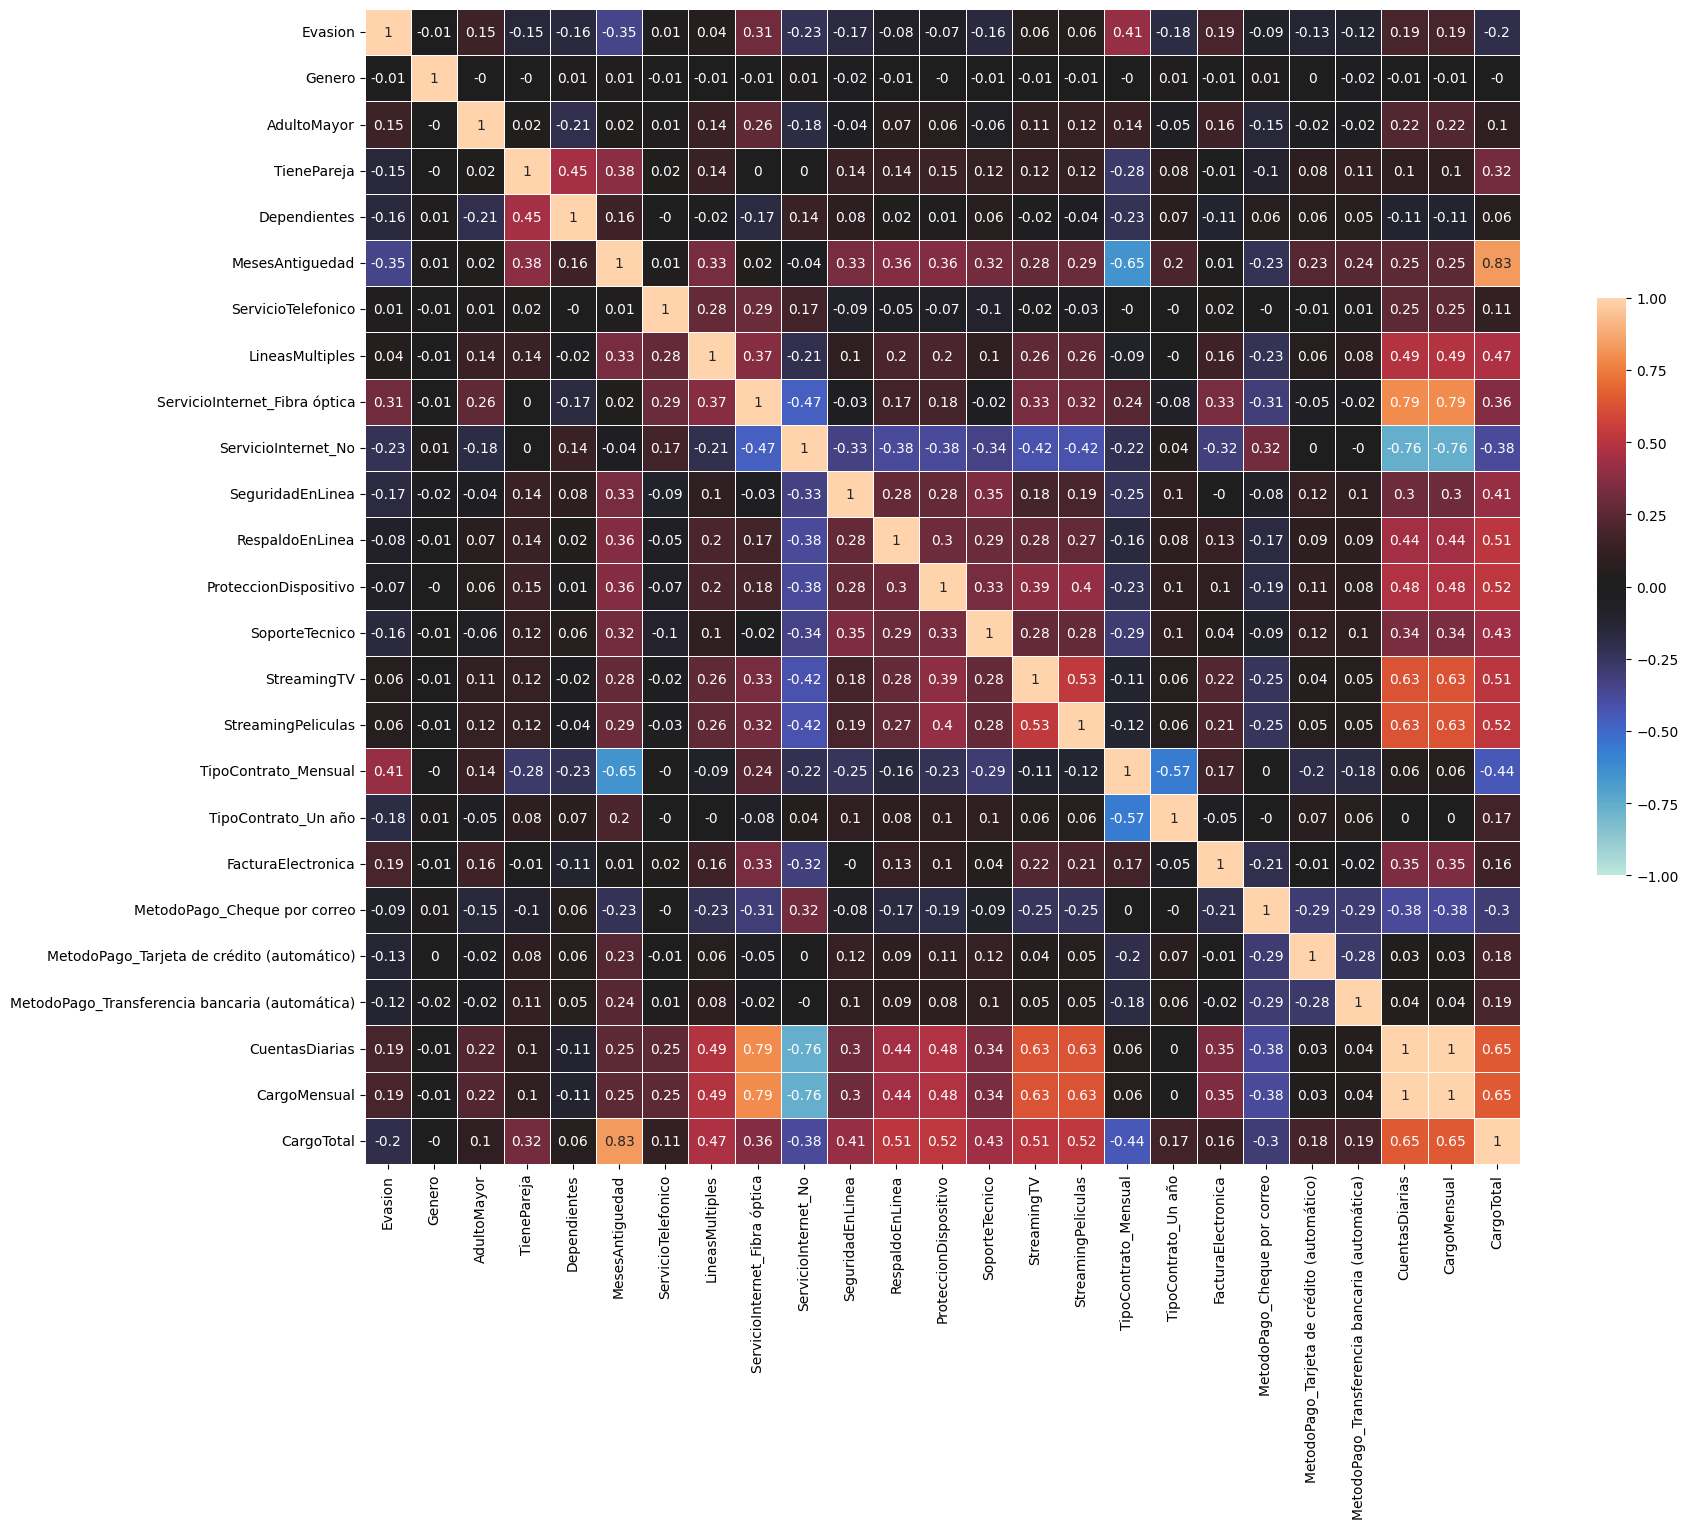

In [18]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(np.round(correlacion, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

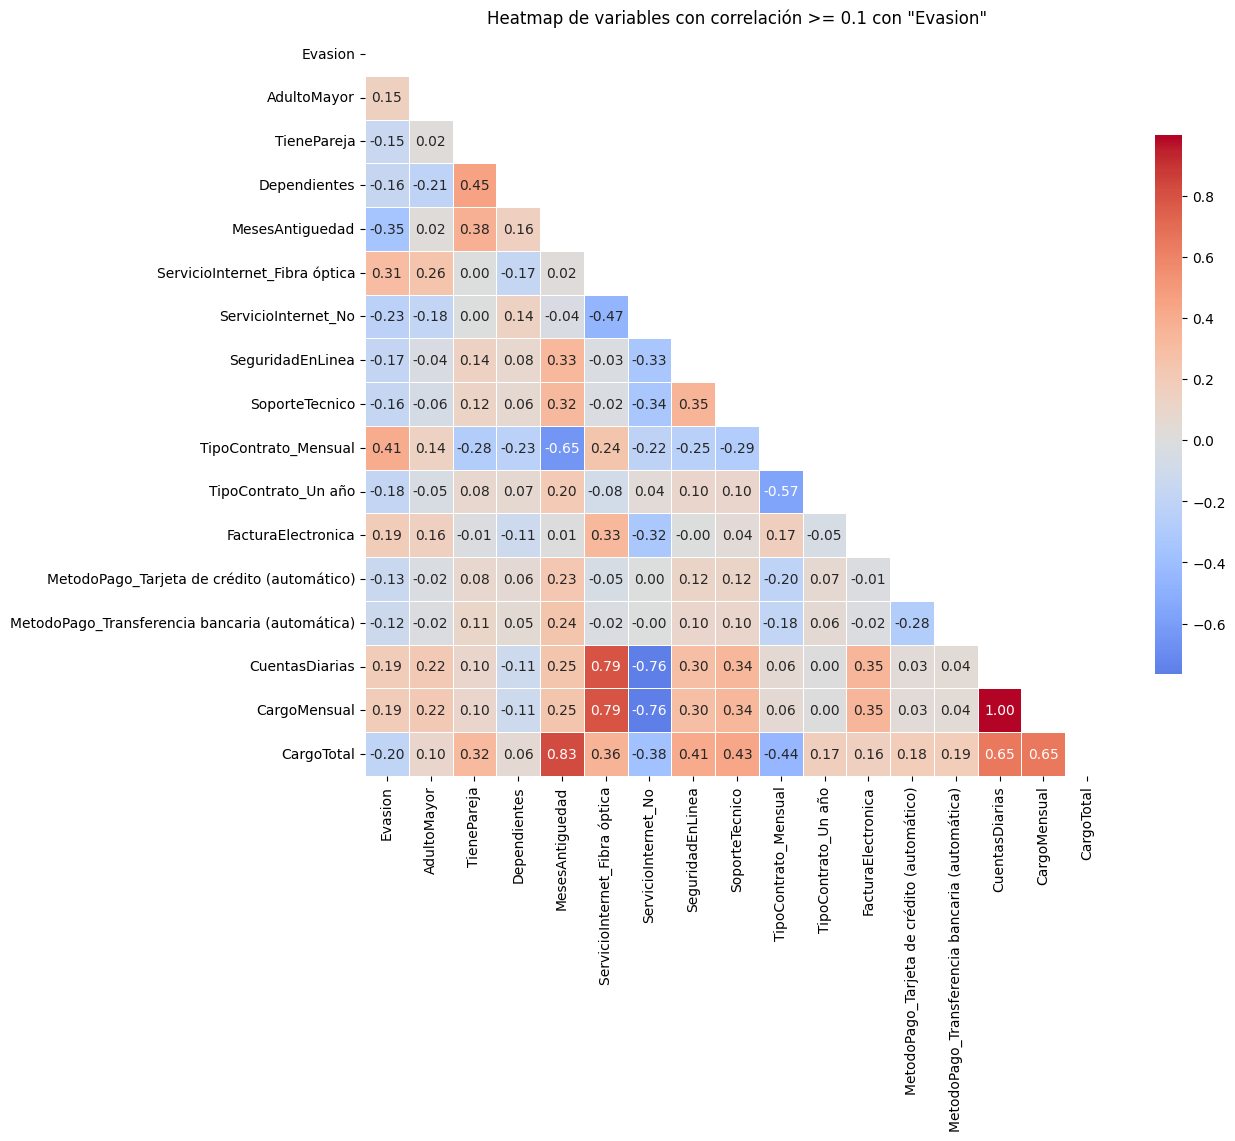

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Variable objetivo
variable_objetivo = 'Evasion'

# Definir el umbral mínimo de correlación absoluta para selección
limite = 0.1

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variables_relevantes = correlacion.index[abs(correlacion[variable_objetivo]) >= limite].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if variable_objetivo not in variables_relevantes:
    variables_relevantes.append(variable_objetivo)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = correlacion.loc[variables_relevantes, variables_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limite} con "{variable_objetivo}"')
plt.show()

**Relacionando Variables con variable 'Evasion'**

In [20]:
print(correlacion[variable_objetivo].abs().sort_values(ascending=False))

Evasion                                           1.000000
TipoContrato_Mensual                              0.405103
MesesAntiguedad                                   0.352229
ServicioInternet_Fibra óptica                     0.308020
ServicioInternet_No                               0.227890
CargoTotal                                        0.198324
CuentasDiarias                                    0.193412
CargoMensual                                      0.193356
FacturaElectronica                                0.191825
TipoContrato_Un año                               0.177820
SeguridadEnLinea                                  0.171226
SoporteTecnico                                    0.164674
Dependientes                                      0.164221
AdultoMayor                                       0.150889
TienePareja                                       0.150448
MetodoPago_Tarjeta de crédito (automático)        0.134302
MetodoPago_Transferencia bancaria (automática)    0.1179

In [21]:
datos_codificados[['CargoMensual', 'CuentasDiarias']].corr()

,CargoMensual,CuentasDiarias
CargoMensual,1.000000,0.999996
CuentasDiarias,0.999996,1.000000


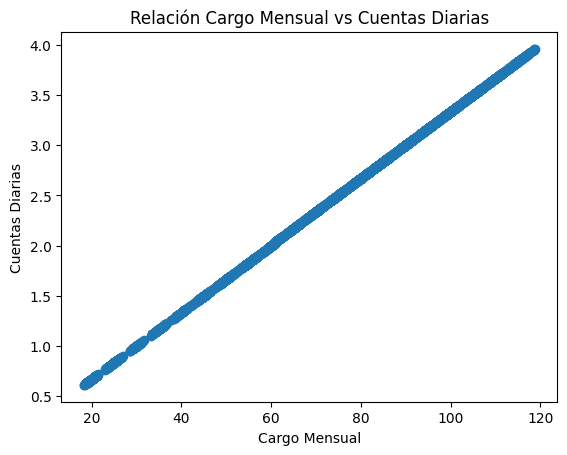

In [22]:
plt.scatter(datos_codificados['CargoMensual'],datos_codificados['CuentasDiarias']) #ejes x,y
plt.title('Relación Cargo Mensual vs Cuentas Diarias')
plt.xlabel('Cargo Mensual')
plt.ylabel('Cuentas Diarias')
plt.show()

In [23]:
datos_codificados[['CargoTotal', 'CuentasDiarias']].corr()

,CargoTotal,CuentasDiarias
CargoTotal,1.000000,0.651189
CuentasDiarias,0.651189,1.000000


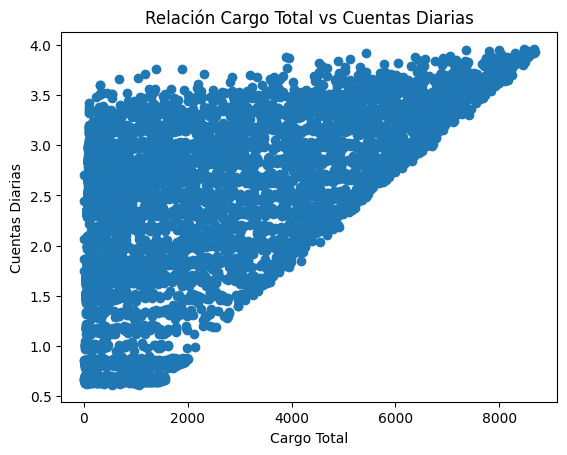

In [24]:
plt.scatter(datos_codificados['CargoTotal'],datos_codificados['CuentasDiarias']) #ejes x,y
plt.title('Relación Cargo Total vs Cuentas Diarias')
plt.xlabel('Cargo Total')
plt.ylabel('Cuentas Diarias')
plt.show()

In [25]:
datos_codificados[['MesesAntiguedad', 'CargoTotal']].corr()

,MesesAntiguedad,CargoTotal
MesesAntiguedad,1.000000,0.826178
CargoTotal,0.826178,1.000000


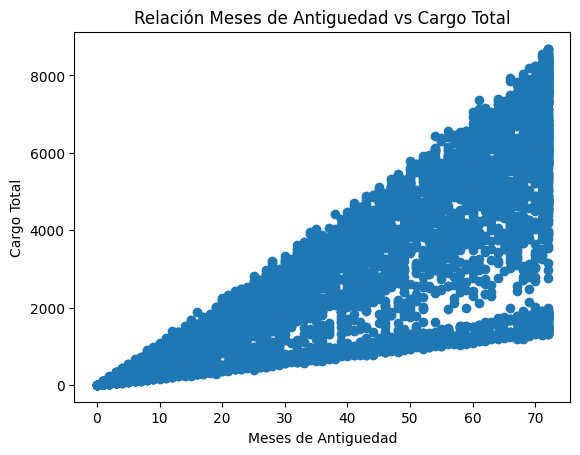

In [26]:
plt.scatter(datos_codificados['MesesAntiguedad'],datos_codificados['CargoTotal']) #ejes x,y
plt.title('Relación Meses de Antiguedad vs Cargo Total')
plt.xlabel('Meses de Antiguedad')
plt.ylabel('Cargo Total')
plt.show()

In [97]:
# Se omite la variable respuesta
predictores = datos_codificados.drop(columns='Evasion', errors='ignore')

# Matriz de correlación absoluta entre predictores
corr_pred = predictores.corr(numeric_only=True).abs()

# Quedarnos con el triángulo superior (sin diagonal)
upper = corr_pred.where(np.triu(np.ones_like(corr_pred, dtype=bool), k=1))

# Pares por encima del umbral
umbral_corr = 0.85
pareja_correlacion = (upper
    .stack()
    .reset_index()
    .rename(columns={'level_0':'col1','level_1':'col2', 0:'corr'})
    .query('corr >= @umbral_corr')
    .sort_values('corr', ascending=False)
)
pareja_correlacion

,col1,col2,corr
273,CuentasDiarias,CargoMensual,0.999996


### **Verificación de la proporción de Evasión**

Visualización gráfica de clientes que evaden (Sí) vs clientes que permanecen (No)

In [28]:
cantidad_evasion = datos_codificados.Evasion.value_counts()
proporcion_evasion = datos_codificados['Evasion'].value_counts(normalize=True).sort_index()

print(f'De un total de {datos_codificados["Evasion"].size} clientes.')
print(f'Los clientes que evaden son: {cantidad_evasion[1].sum()}, equivalentes al {proporcion_evasion[1]:.2%}')
print(f'Los clientes que permanecen son: {cantidad_evasion[0].sum()}, equivalentes al {proporcion_evasion[0]:.2%}')

De un total de 7043 clientes.
Los clientes que evaden son: 1869, equivalentes al 26.54%
Los clientes que permanecen son: 5174, equivalentes al 73.46%


In [29]:
px.histogram(datos, x='Evasion', text_auto=True, color='Evasion') #plotly.express

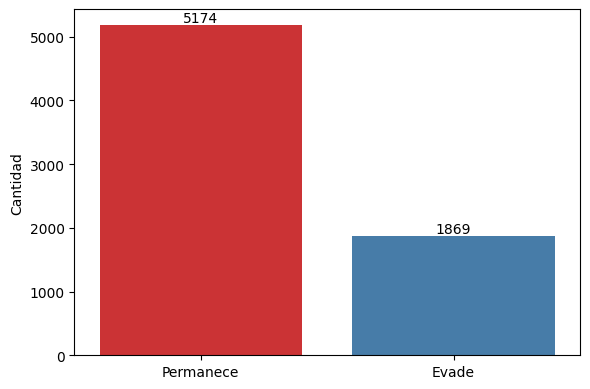

In [30]:
plt.figure(figsize=(6, 4))  # Opcional: ajustar el tamaño del gráfico

# Crear el gráfico
sns.countplot(data=datos, x='Evasion', hue='Evasion', palette='Set1', legend=False)

# Configurar etiquetas
plt.ylabel('Cantidad')
plt.xlabel('Evasión', visible=False)
plt.xticks([0, 1], ['Permanece', 'Evade'])

# Añadir los conteos sobre las barras
for p in plt.gca().patches:
    altura = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, altura + 1,  # +1 para dejar espacio
             int(altura), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

---
>* **Se observa una diferencia significativa entre la cantidad de clientes que permanecen y aquellos que abandonan el servicio. Aunque la mayoría de los clientes se mantiene, el porcentaje de evasión alcanza un 26.54%, lo cual representa una proporción bastante considerable.**

---

### **Análisis Exploratorio de variables categóricas y numéricas**

### **Separación de Variables Explicativas y Respuesta**

In [31]:
from sklearn.model_selection import train_test_split

# Variables Explicativas
X = datos_codificados.drop('Evasion', axis=1)

# Variable Respuesta
y = datos_codificados['Evasion']

# División inicial entre conjunto general y conjunto de prueba (30% para prueba)
X, X_test,y,y_test = train_test_split(X,y,test_size= 0.2, stratify = y, random_state = 5)

# División secundaria: entrenamiento vs validación
X_train, X_val,y_train,y_val = train_test_split(X,y, stratify = y, random_state = 5)

In [32]:
X.head()

,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet_Fibra óptica,ServicioInternet_No,SeguridadEnLinea,...,StreamingPeliculas,TipoContrato_Mensual,TipoContrato_Un año,FacturaElectronica,MetodoPago_Cheque por correo,MetodoPago_Tarjeta de crédito (automático),MetodoPago_Transferencia bancaria (automática),CuentasDiarias,CargoMensual,CargoTotal
2939,1,0,1,0,5,1,0,1,0,0,...,1,1,0,1,0,0,0,3.15,94.45,498.10
4419,0,1,0,0,1,1,0,1,0,0,...,1,1,0,1,0,0,0,2.83,85.00,85.00
6654,1,0,1,0,37,1,0,1,0,0,...,1,1,0,1,0,0,0,3.01,90.35,3419.30
2972,0,1,1,0,17,1,1,1,0,1,...,0,1,0,1,0,0,1,2.84,85.35,1463.45
5806,0,0,0,0,31,1,0,0,1,0,...,0,0,0,0,0,1,0,0.70,20.90,689.35


In [33]:
y.head()

,Evasion
2939,1
4419,1
6654,0
2972,1
5806,0


## **Entrenando Modelos**

En esta sección se entrenan y evalúan tres modelos de clasificación supervisada —**`Regresión Logística`**, **`Árbol de Decisión`** y **`Random Forest`**— con el objetivo de identificar cuál de ellos ofrece el mejor desempeño para **predecir si un cliente permanecerá o evadirá**. Cada modelo es evaluado mediante métricas clave como **`precisión`**, **`sensibilidad (recall)`**, **`exactitud`**, **`F1-score`**, **`AUC-ROC`**, y **`curvas de precisión vs recall`**, además de la visualización de sus respectivas **`matrices de confusión`**.

In [34]:
# Modelo Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier
# Crea una instancia del modelo de Random Forest
modelo_arbol = DecisionTreeClassifier(max_depth=10, random_state=5) # Límite de profundidad = 10
# Entrena el modelo
modelo_arbol.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del Modelo de Árbol con el conjunto de entrenamiento es de: {modelo_arbol.score(X_train,y_train)}')
print(f'La exactitud del Modelo de Árbol con el conjunto de validación es de: {modelo_arbol.score(X_val,y_val)}')

La exactitud del Modelo de Árbol con el conjunto de entrenamiento es de: 0.890414201183432
La exactitud del Modelo de Árbol con el conjunto de validación es de: 0.759403832505323


In [35]:
# Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
# Crea una instancia del modelo de Random Forest
modelo_forest = RandomForestClassifier(max_depth=10, random_state=5) # Límite de profundidad = 10
# Entrena el modelo
modelo_forest.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del Modelo Forest con el conjunto de entrenamiento es de: {modelo_forest.score(X_train,y_train)}')
print(f'La exactitud del Modelo Forest con el conjunto de validación es de: {modelo_forest.score(X_val,y_val)}')

La exactitud del Modelo Forest con el conjunto de entrenamiento es de: 0.8953846153846153
La exactitud del Modelo Forest con el conjunto de validación es de: 0.8069552874378992


In [36]:
# Modelo Regresión Logística
from sklearn.linear_model import LogisticRegression
# Crea una instancia del modelo de regresión logística
modelo_logistica = LogisticRegression(max_iter=2000, solver='liblinear')
# Entrena el modelo
modelo_logistica.fit(X_train, y_train)
print(f'La exactitud del Modelo de Regresión Logística con el conjunto de entrenamiento es de: {modelo_logistica.score(X_train,y_train)}')
print(f'La exactitud del Modelo de Regresión Logística con el conjunto de validación es de: {modelo_logistica.score(X_val,y_val)}')

La exactitud del Modelo de Regresión Logística con el conjunto de entrenamiento es de: 0.8009467455621302
La exactitud del Modelo de Regresión Logística con el conjunto de validación es de: 0.8019872249822569


**Entrenamiento y evaluación de modelos**

* Se **entrenaron tres modelos de clasificación** utilizando `X_train, y_train` y se evaluaron en `X_val, y_val`. La métrica utilizada fue accuracy (`.score()` de scikit-learn).

* La partición utilizada es la previamente definida (estratificada y con `random_state=5`).

**Modelos y configuración**

* **Árbol de Decisión** (`DecisionTreeClassifier`) con `max_depth=10`.
* **Random Forest** (`RandomForestClassifier`) con `max_depth=10`.
* **Regresión Logística** (`LogisticRegression`) con `solver='liblinear'` y `max_iter=2000`.

**Resultados (accuracy)**

* **Árbol de Decisión**
> * Entrenamiento: **0.890**  
> * Validación: **0.759**

* **Random Forest**
> * Entrenamiento: **0.895**  
> * Validación: **0.807**

* **Regresión Logística**
> * Entrenamiento: **0.801**  
> * Validación: **0.802**

**Observaciones**

* El **Árbol de Decisión** muestra una **brecha train–val ≈ 0.131**, indicando **sobreajuste**.
* El **Random Forest** presenta una **brecha menor (≈ 0.088)** y el **mejor accuracy en validación (0.807)**, por lo que **generaliza mejor** que el árbol simple.
* La **Regresión Logística** tiene la **brecha más baja (≈ 0.001)** —prácticamente sin sobreajuste— y un desempeño de validación **muy cerca de Random Forest (0.802 vs 0.807)**.
* Los tres modelos superan el baseline de predecir siempre la **clase mayoritaria (~0.735)**.

**Conclusión**

* **Random Forest** es el mejor punto de partida por **mayor accuracy en validación** y **menor sobreajuste** que el árbol.  
* **Regresión Logística** es una **alternativa fuerte y más interpretable**, con rendimiento cercano y excelente estabilidad entre entrenamiento y validación.  
* Hay margen de mejora con ajuste de hiperparámetros y con métricas más alineadas al objetivo de negocio (p. ej., maximizar recall para “Evade”).




### **Matriz de Confusión**

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
# Genera las predicciones del modelo de Árbol de Decisión usando los datos del conjunto de validación.
y_previsto_arbol = modelo_arbol.predict(X_val)
# Matriz de Confusión tipo Array - Modelo Árbol
matriz_confusion_arbol = confusion_matrix(y_val,y_previsto_arbol)
print(matriz_confusion_arbol)

[[886 149]
 [190 184]]


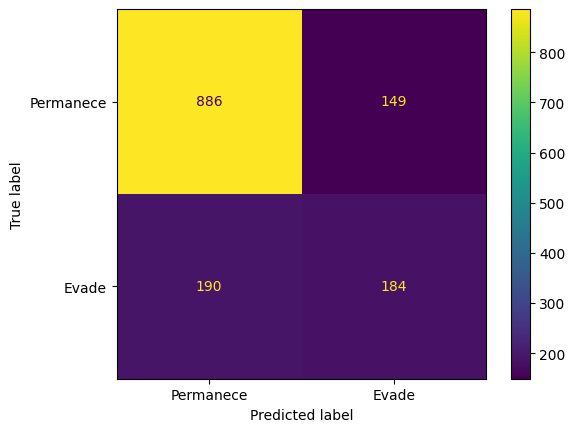

In [39]:
# Matriz de Confusión - Modelo Árbol
visualizacion_arbol = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_arbol,
    display_labels=['Permanece', 'Evade']  # Etiquetas para las clases 0 y 1
)
visualizacion_arbol.plot();

In [40]:
# Genera las predicciones del modelo de Random Forest usando los datos del conjunto de validación.
y_previsto_forest = modelo_forest.predict(X_val)
# Matriz de Confusión tipo Array - Modelo Random Forest
matriz_confusion_forest = confusion_matrix(y_val,y_previsto_forest)
print(matriz_confusion_forest)

[[949  86]
 [186 188]]


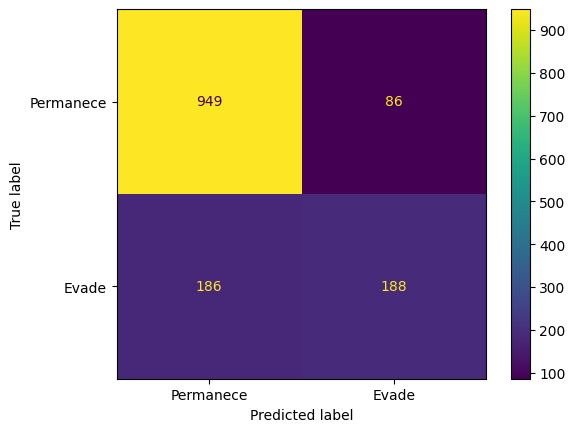

In [41]:
# Matriz de Confusión - Modelo Random Forest
visualizacion_forest = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_forest,
    display_labels=['Permanece', 'Evade']  # Etiquetas para las clases 0 y 1
)
visualizacion_forest.plot();

In [42]:
# Genera las predicciones del modelo de Regresión Logística usando los datos del conjunto de validación.
y_previsto_logistica = modelo_logistica.predict(X_val)
# Matriz de Confusión tipo Array - Modelo Regresión Logística
matriz_confusion_logistica = confusion_matrix(y_val, y_previsto_logistica)
print(matriz_confusion_logistica)

[[941  94]
 [185 189]]


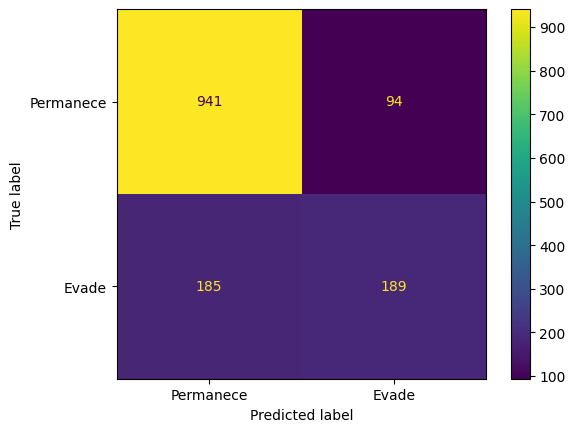

In [43]:
# Matriz de Confusión - Modelo Regresión Logística
visualizacion_logistica = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_logistica,
    display_labels=['Permanece', 'Evade']  # Etiquetas para las clases 0 y 1
)
visualizacion_logistica.plot();

**Matriz de confusión y métricas de evaluación**

* Con los modelos ya entrenados sobre `X_train, y_train`, se obtuvieron **predicciones en `X_val`** y se calcularon la **matriz de confusión** y métricas para la clase positiva **“Evade” (1)**.
* El formato de la matriz impresa es `[[TN FP], [FN TP]]`.

**Árbol de Decisión (max_depth = 10)**

> * Matriz: `[[886 149], [190 184]]`  
> * Accuracy: **0.759**  
> * Precisión (Evade): **0.553**  
> * Recall / Sensibilidad (Evade): **0.492**  
> * F1 (Evade): **0.521**

**Random Forest (max_depth = 10)**

> * Matriz: `[[949  86], [186 188]]`  
> * Accuracy: **0.807**  
> * Precisión (Evade): **0.686**  
> * Recall / Sensibilidad (Evade): **0.503**  
> * F1 (Evade): **0.580**

**Regresión Logística**

> * Matriz: `[[941  94], [185 189]]`  
> * Accuracy: **0.802**  
> * Precisión (Evade): **0.668**  
> * Recall / Sensibilidad (Evade): **0.505**  
> * F1 (Evade): **0.575**

**Lecturas rápidas**

* **Random Forest** logra la **mayor accuracy (0.807)** y el **mejor F1 (0.580)**, con la **precisión más alta** para “Evade”.  
* **Regresión Logística** queda muy cerca en accuracy (**0.802**) y F1 (**0.575**), con **recall similar** al de Random Forest.  
* **Árbol de Decisión** presenta la **menor precisión y F1** en esta comparación.  
* Los **tres modelos superan el baseline** de clasificar siempre la clase mayoritaria (**~0.735**).

**Conclusión**

* Para un balance entre **precisión y recall** manteniendo **mejor desempeño global**, **Random Forest** es la opción inicial recomendada.  
* Si se busca un modelo **lineal, interpretable** y con desempeño cercano, **Regresión Logística** es una buena alternativa.  
* El **Árbol de Decisión** puede servir como línea base explicativa, pero rinde peor en estas métricas.


### **Métricas de Evaluación**

#### **Precisión, recall, accuracy y F1-Score**

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [45]:
# Métricas Modelo Árbol
print(f'La precisión del modelo de árbol es: {precision_score(y_val,y_previsto_arbol)}')
print(f'La sensibilidad (recall) del modelo de árbol es: {recall_score(y_val,y_previsto_arbol)}')
print(f'La exactitud (accuracy) del modelo de árbol es: {accuracy_score(y_val,y_previsto_arbol)}')
print(f'El F1-Score del modelo de árbol es: {f1_score(y_val,y_previsto_arbol)}')

La precisión del modelo de árbol es: 0.5525525525525525
La sensibilidad (recall) del modelo de árbol es: 0.4919786096256685
La exactitud (accuracy) del modelo de árbol es: 0.759403832505323
El F1-Score del modelo de árbol es: 0.5205091937765205


In [46]:
# Métricas Modelo Forest
print(f'La precisión del modelo forest es: {precision_score(y_val,y_previsto_forest)}')
print(f'La sensibilidad (recall) del modelo forest es: {recall_score(y_val,y_previsto_forest)}')
print(f'La exactitud (accuracy) del modelo forest es: {accuracy_score(y_val,y_previsto_forest)}')
print(f'El F1-Score del modelo forest es: {f1_score(y_val,y_previsto_forest)}')

La precisión del modelo forest es: 0.6861313868613139
La sensibilidad (recall) del modelo forest es: 0.5026737967914439
La exactitud (accuracy) del modelo forest es: 0.8069552874378992
El F1-Score del modelo forest es: 0.5802469135802469


In [47]:
# Métricas Modelo Regresión Logística
print(f'La precisión del modelo de Regresión Logística es: {precision_score(y_val,y_previsto_logistica)}')
print(f'La sensibilidad (recall) del modelo de Regresión Logística es: {recall_score(y_val,y_previsto_logistica)}')
print(f'La exactitud (accuracy) del modelo de Regresión Logística es: {accuracy_score(y_val,y_previsto_logistica)}')
print(f'El F1-Score del modelo de Regresión Logística es: {f1_score(y_val,y_previsto_logistica)}')

La precisión del modelo de Regresión Logística es: 0.6678445229681979
La sensibilidad (recall) del modelo de Regresión Logística es: 0.5053475935828877
La exactitud (accuracy) del modelo de Regresión Logística es: 0.8019872249822569
El F1-Score del modelo de Regresión Logística es: 0.5753424657534246


**Precisión, recall, accuracy y F1-Score (validación)**

* Las métricas se calcularon sobre `X_val, y_val`. Clase positiva: **“Evade” (1)**.

**Árbol de Decisión (max_depth = 10)**  
> * Precisión: **0.553**  
> * Recall: **0.492**  
> * Accuracy: **0.759**  
> * F1-Score: **0.521**

**Random Forest (max_depth = 10)**  
> * Precisión: **0.686**  
> * Recall: **0.503**  
> * Accuracy: **0.807**  
> * F1-Score: **0.580**

**Regresión Logística**  
> * Precisión: **0.668**  
> * Recall: **0.505**  
> * Accuracy: **0.802**  
> * F1-Score: **0.575**

**Lecturas rápidas**
* **Random Forest** obtiene el **mejor F1 (0.580)** y la **mayor precisión** para “Evade”, junto con la **mejor accuracy**.  
* **Regresión Logística** queda **muy cerca** en F1 (**0.575**) y accuracy (**0.802**).  
* **Árbol de Decisión** es el que **menos rinde** en estas métricas.


#### **Curva ROC y Métrica AUC**

In [48]:
# Importamos la herramienta para graficar la curva ROC
from sklearn.metrics import RocCurveDisplay
# Importamos la función para calcular el área bajo la curva ROC (AUC)
from sklearn.metrics import roc_auc_score

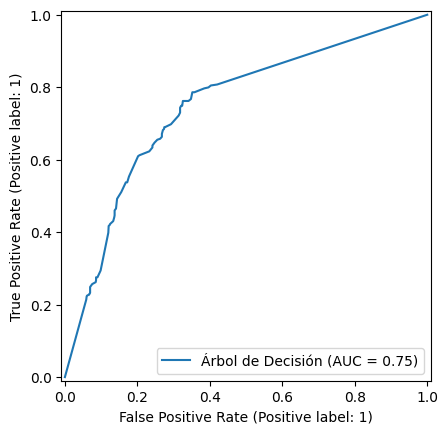

In [49]:
# Puntajes: probabilidad de la clase positiva (Evade = 1)
y_score_arbol  = modelo_arbol.predict_proba(X_val)[:, 1]

# Curva ROC Modelo Árbol
RocCurveDisplay.from_predictions(y_val, y_score_arbol,  name='Árbol de Decisión');

In [50]:
# El Área Bajo la Curva (AUC) - Modelo Árbol
print(f'El área bajo la curva ROC del modelo de Árbol de Decisión es de:  {roc_auc_score(y_val, y_score_arbol):.4f}')

El área bajo la curva ROC del modelo de Árbol de Decisión es de:  0.7472


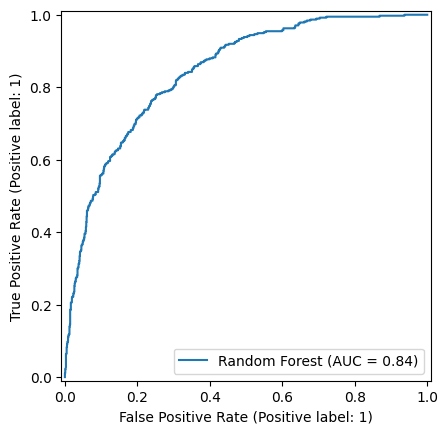

In [51]:
# Puntajes: probabilidad de la clase positiva (Evade = 1)
y_score_forest = modelo_forest.predict_proba(X_val)[:, 1]

# Curva ROC Modelo Forest
RocCurveDisplay.from_predictions(y_val, y_score_forest, name='Random Forest');

In [52]:
# El Área Bajo la Curva (AUC) - Modelo Forest
print(f'El área bajo la curva ROC del modelo Random Forest es de: {roc_auc_score(y_val, y_score_forest):.4f}')

El área bajo la curva ROC del modelo Random Forest es de: 0.8425


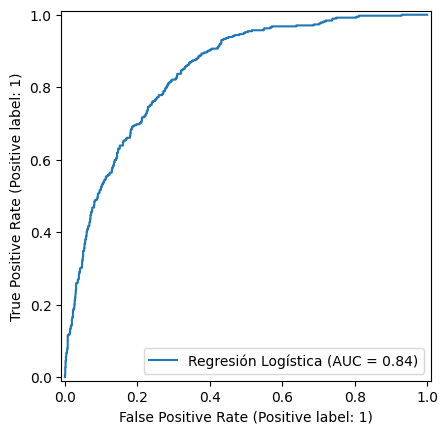

In [53]:
# Calcular las probabilidades de predicción en el conjunto de prueba
y_proba_logistica = modelo_logistica.predict_proba(X_val)[:, 1]
# Curva ROC Modelo Regresión Logística
RocCurveDisplay.from_predictions(y_val, y_proba_logistica,  name='Regresión Logística');

In [54]:
# El Área Bajo la Curva (AUC) - Modelo Regresión Logística
print(f'El área bajo la curva ROC del modelo de Regresión Logística es de: {roc_auc_score(y_val, y_proba_logistica):.4f}')

El área bajo la curva ROC del modelo de Regresión Logística es de: 0.8413


**Curva ROC y Métrica AUC**

* Se obtuvieron **probabilidades de la clase positiva (Evade = 1)** con `predict_proba[:, 1]` para cada modelo.
* Con esos puntajes se graficó la **curva ROC** y se calculó el **AUC** sobre `y_val` (métrica independiente del umbral).

**Árbol de Decisión (max_depth = 10)**  
> * AUC (ROC): **0.747**

**Random Forest (max_depth = 10)**  
> * AUC (ROC): **0.843**

**Regresión Logística (solver = liblinear, max_iter = 2000)**  
> * AUC (ROC): **0.841**

**Lecturas rápidas**

* Los tres modelos superan el azar (`AUC > 0.5`).  
* **Random Forest** logra el **mejor AUC (≈ 0.843)**; la **Regresión Logística** queda **muy cerca (≈ 0.841)**.  
* El **Árbol de Decisión** queda por detrás (**≈ 0.747**), coherente con sus resultados de accuracy/F1.

**Conclusión**

* Para **priorizar clientes por riesgo** usando un *score*, **Random Forest** o **Regresión Logística** son las mejores opciones (AUC altos y estables).  



#### **Curva de Precisión x Recall y Métrica AP (Average Precision)**

In [55]:
# Importamos la clase que permite graficar la curva Precisión vs Recall
from sklearn.metrics import PrecisionRecallDisplay

# Importamos la métrica de promedio de precisión (average precision)
from sklearn.metrics import average_precision_score

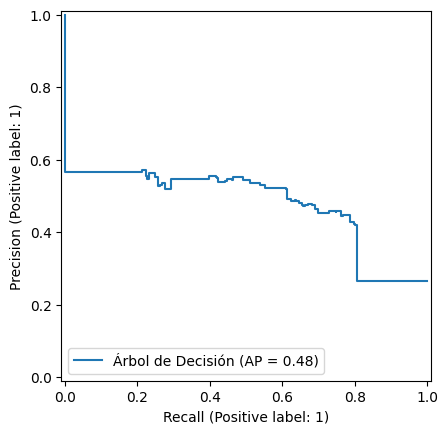

In [56]:
# Curva de Precisión x Recall - Modelo Árbol de Decisión
PrecisionRecallDisplay.from_predictions(y_val, y_score_arbol, name='Árbol de Decisión');

In [57]:
# Métrica AP - Modelo Árbol de Decisión
print(f'El score promedio de precisión vs recall para el modelo de árbol es de: {average_precision_score(y_val, y_score_arbol)}')

El score promedio de precisión vs recall para el modelo de árbol es de: 0.4781389771493705


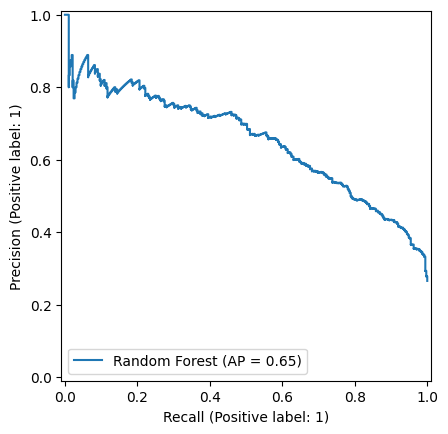

In [58]:
# Curva de Precisión x Recall - Modelo Random Forest
PrecisionRecallDisplay.from_predictions(y_val, y_score_forest, name='Random Forest');

In [59]:
# Métrica AP - Modelo Random Forest
print(f'El score promedio de precisión vs recall para el modelo forest es de: {average_precision_score(y_val, y_score_forest)}')

El score promedio de precisión vs recall para el modelo forest es de: 0.654099584021899


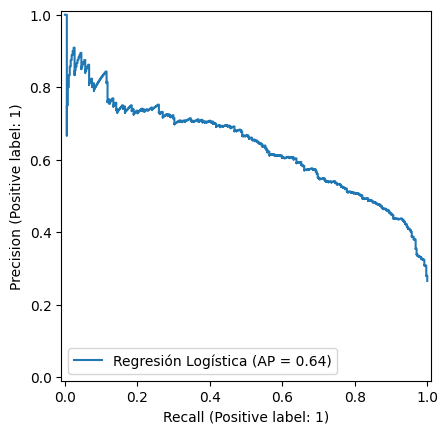

In [60]:
# Curva de Precisión x Recall - Modelo Regresión Logística
PrecisionRecallDisplay.from_predictions(y_val, y_proba_logistica, name='Regresión Logística');

In [61]:
# Métrica AP - Modelo Regresión Logística
print(f'El score promedio de precisión vs recall para el modelo de Regresión Logística es de: {average_precision_score(y_val, y_proba_logistica)}')

El score promedio de precisión vs recall para el modelo de Regresión Logística es de: 0.6371819971566661


**Curvas Precisión–Recall y Métrica AP (Average Precision)**

* Se calcularon las curvas **Precisión–Recall** y la métrica **AP** usando las probabilidades de pertenecer a la clase positiva **“Evade (1)”** sobre `X_val`.
* El **AP** es el área bajo la curva Precisión–Recall; en problemas desbalanceados es más informativo que la accuracy.  
  El baseline del AP es la prevalencia de la clase positiva en validación (**≈ 0.266**).

**Resultados (validación)**

* **Árbol de Decisión (max_depth = 10)**  
  > AP: **0.478**

* **Random Forest (max_depth = 10)**  
  > AP: **0.654**

* **Regresión Logística**  
  > AP: **0.637**

**Lecturas rápidas**

* Los **tres modelos** superan el baseline de prevalencia (**~0.266**), por lo que aportan valor para encontrar evasores.
* **Random Forest** obtiene el **mayor AP**, manteniendo el mejor compromiso precisión–recall a lo largo de los umbrales.
* **Regresión Logística** queda **muy cerca** del bosque en AP y también muestra buen desempeño bajo desbalance.
* El **Árbol de Decisión** es el que menos área logra, coherente con sus métricas de precisión/recall más modestas.


#### **Informe de Métricas**

In [62]:
# Informe de Métricas
from sklearn.metrics import classification_report

In [63]:
# Informe de Métricas para Modelo Árbol de Decisión
print('*******************************************************')
print(f'Informe de Métricas para Modelo de Árbol:\n_______________________________________________________\n{classification_report(y_val, y_previsto_arbol)}')
print('*******************************************************\n\n')

# Informe de Métricas para Modelo Random Forest
print('*******************************************************')
print(f'Informe de Métricas para Modelo Forest:\n_______________________________________________________\n{classification_report(y_val, y_previsto_forest)}')
print('*******************************************************\n\n')

# Informe de Métricas para Modelo de Regresión Logística
print('*******************************************************')
print(f'Informe de Métricas para Modelo de Regresión Logística:\n_______________________________________________________\n{classification_report(y_val, y_previsto_logistica)}')
print('*******************************************************')

*******************************************************
Informe de Métricas para Modelo de Árbol:
_______________________________________________________
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1035
           1       0.55      0.49      0.52       374

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409

*******************************************************


*******************************************************
Informe de Métricas para Modelo Forest:
_______________________________________________________
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1035
           1       0.69      0.50      0.58       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81    

**Informe de métricas (classification_report)**

* Se generó el **informe de métricas** en el conjunto de validación (`X_val`, `y_val`) para los **tres modelos** ya entrenados.
* Las métricas mostradas por clase son: **precision**, **recall** y **f1-score**; además se reporta el **accuracy** global.

**Árbol de Decisión (max_depth = 10)**

> * Clase 0 (Permanece): **precision 0.82**, **recall 0.86**, **f1 0.84**, support **1035**  
> * Clase 1 (Evade): **precision 0.55**, **recall 0.49**, **f1 0.52**, support **374**  
> * **Accuracy global:** **0.76**  
> * **Macro avg** — precision **0.69**, recall **0.67**, f1 **0.68**, support **1409**  
> * **Weighted avg** — precision **0.75**, recall **0.76**, f1 **0.75**, support **1409**

**Random Forest (max_depth = 10)**

> * Clase 0 (Permanece): **precision 0.84**, **recall 0.92**, **f1 0.87**, support **1035**  
> * Clase 1 (Evade): **precision 0.69**, **recall 0.50**, **f1 0.58**, support **374**  
> * **Accuracy global:** **0.81**  
> * **Macro avg** — precision **0.76**, recall **0.71**, f1 **0.73**, support **1409**  
> * **Weighted avg** — precision **0.80**, recall **0.81**, f1 **0.80**, support **1409**

**Regresión Logística**

> * Clase 0 (Permanece): **precision 0.84**, **recall 0.91**, **f1 0.87**, support **1035**  
> * Clase 1 (Evade): **precision 0.67**, **recall 0.51**, **f1 0.58**, support **374**  
> * **Accuracy global:** **0.80**  
> * **Macro avg** — precision **0.75**, recall **0.71**, f1 **0.72**, support **1409**  
> * **Weighted avg** — precision **0.79**, recall **0.80**, f1 **0.79**, support **1409**

**Lecturas rápidas**

* **Random Forest** presenta la **mayor exactitud global (0.81)** y, junto con **Regresión Logística (0.80)**, mantiene **buena precisión** en *Evade*.  
* **Árbol de Decisión** consigue **menos desempeño global** y **menor precisión** en *Evade*, aunque es competitivo en *f1* para la clase mayoritaria.  
* Entre **Random Forest** y **Regresión Logística** las métricas son cercanas; el bosque rinde **ligeramente mejor** en recall/f1 ponderado.

**Conclusión**

* Para un punto de partida, **Random Forest** se recomienda por su **mejor desempeño global**.  
* **Regresión Logística** es una alternativa interpretable con resultados muy similares.  
* Si el objetivo es **capturar más evasores**, puede ajustarse el **umbral de decisión** (en cualquiera de los dos modelos probabilísticos) para aumentar el *recall* en *Evade*, asumiendo más falsos positivos.


## **Validación Cruzada**

### **Intervalo de confianza con validación cruzada + KFold**

In [64]:
from sklearn.model_selection import KFold, cross_validate

In [65]:
kf = KFold(n_splits=10, shuffle=True, random_state = 5)

In [66]:
# Métricas Modelo Árbol de Decisión
cv_arbol = cross_validate(modelo_arbol, X, y, cv=kf)

# Métricas Modelo Random Forest
cv_forest = cross_validate(modelo_forest, X, y, cv=kf)

# Métricas Modelo Regresión Logística
cv_logistica = cross_validate(modelo_logistica, X, y, cv=kf)

In [67]:
# Validación Cruzada con Múltiples Métricas en Modelo de Árbol de Decisión
cv_arbol

{'fit_time': array([0.03246284, 0.03124261, 0.03110719, 0.03050399, 0.03446555,
        0.04158831, 0.03097105, 0.03112316, 0.0294044 , 0.02989101]),
 'score_time': array([0.00277305, 0.00263476, 0.00254703, 0.00285077, 0.00393653,
        0.003124  , 0.0025456 , 0.00249457, 0.00247693, 0.00254917]),
 'test_score': array([0.78900709, 0.77659574, 0.73758865, 0.75177305, 0.75310835,
        0.74600355, 0.77619893, 0.75666075, 0.72824156, 0.75488455])}

In [68]:
# Validación Cruzada con Múltiples Métricas en Modelo de Random Forest
cv_forest

{'fit_time': array([0.57504416, 0.57219148, 0.55932999, 0.58679914, 0.56614661,
        0.57424212, 0.57060432, 0.56118941, 0.5831635 , 0.57617211]),
 'score_time': array([0.01618433, 0.02036095, 0.01719141, 0.01903796, 0.02164388,
        0.01629806, 0.01657891, 0.01670647, 0.0174377 , 0.01648211]),
 'test_score': array([0.81028369, 0.80141844, 0.80851064, 0.79964539, 0.78330373,
        0.80639432, 0.79396092, 0.80639432, 0.78685613, 0.80106572])}

In [69]:
# Validación Cruzada con Múltiples Métricas en Modelo de Regresión Logística
cv_logistica

{'fit_time': array([0.03118277, 0.02865601, 0.03367186, 0.02871132, 0.02891707,
        0.04656959, 0.03110623, 0.03312254, 0.03220224, 0.0315721 ]),
 'score_time': array([0.00276494, 0.00230169, 0.00238037, 0.00258827, 0.0035212 ,
        0.00266075, 0.00240707, 0.00237298, 0.00230193, 0.00231719]),
 'test_score': array([0.82092199, 0.79609929, 0.79609929, 0.80319149, 0.78685613,
        0.79751332, 0.79396092, 0.80461812, 0.79218472, 0.81882771])}

In [70]:
# Calcula el intervalo de confianza a partir de un diccionario de resultados.
# Usa el promedio y desviación estándar de los valores de test_score.
def intervalo_confianza_test_score(nombre_modelo, resultado):
  promedio = resultado['test_score'].mean()
  desvio_std = resultado['test_score'].std()
  print(f'El intervalo de confianza del Modelo {nombre_modelo} es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std , 1)}')

In [71]:
# Intervalos de confianza para Modelos de Árbol y Random Forest
intervalo_confianza_test_score('Árbol de Decisión',cv_arbol)
intervalo_confianza_test_score('Random Forest',cv_forest)
intervalo_confianza_test_score('Regresión Logística',cv_logistica)

El intervalo de confianza del Modelo Árbol de Decisión es de: 0.7215161003277057,0.7924963456619898
El intervalo de confianza del Modelo Random Forest es de: 0.7824540355408697,0.8171126223077881
El intervalo de confianza del Modelo Regresión Logística es de: 0.7798603777625256,0.8221942183096814


**Validación cruzada (KFold=10, shuffle=True, random_state=5)**

* Se aplicó **validación cruzada** con `KFold` de 10 particiones sobre todo `X, y`.
* La métrica usada fue **accuracy** (método `.score()` por defecto de los clasificadores).
* Se reporta un **rango fold-a-fold** calculado como **media ± 2·desv.estándar** de los `test_score` de cada fold.

**Resultados (accuracy, media ± 2·sd)**

* **Árbol de Decisión**: **0.722 – 0.792**
* **Random Forest**: **0.782 – 0.817**
* **Regresión Logística**: **0.780 – 0.822**

**Lecturas rápidas**

* **Random Forest** y **Regresión Logística** muestran desempeños **similares** y **superiores** al Árbol.
* Los **intervalos de RF y Logística se solapan**, pero ambos quedan por encima del intervalo del Árbol, lo que confirma la brecha observada en el hold-out.
* La magnitud de los rangos es razonable para 10 folds; el **promedio central** ronda **~0.80** para RF/Logística y **~0.76** para Árbol.

**Conclusión**

* En términos de **accuracy promedio**, los **candidatos** son **Random Forest** y **Regresión Logística**; el **Árbol** queda por detrás.
* La elección final debería considerar también las **métricas de ranking** que ya calculaste (**AUC ROC** y **AP**), además del **umbralar** según los costos del negocio.


### **Intervalo de confianza con validación cruzada + StratifiedKFold**

In [72]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

In [73]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

In [74]:
# Validación cruzada - Modelo Árbol de Decisión
cv_arbol = cross_validate(
    modelo_arbol, X, y, cv=skf,
    scoring=['recall', 'precision', 'f1', 'accuracy']
)

# Validación cruzada - Modelo Random Forest
cv_forest = cross_validate(
    modelo_forest, X, y, cv=skf,
    scoring=['recall', 'precision', 'f1', 'accuracy']
)

# Validación cruzada - Modelo Regresión Logística
cv_logistica = cross_validate(
    modelo_logistica, X, y, cv=skf,
    scoring=['recall', 'precision', 'f1', 'accuracy']
)

In [75]:
# Recall validado por separado
cv_recall_arbol = cross_val_score(modelo_arbol, X, y, cv=skf, scoring='recall')
cv_recall_forest = cross_val_score(modelo_forest, X, y, cv=skf, scoring='recall')
cv_recall_logistica = cross_val_score(modelo_logistica, X, y, cv=skf, scoring='recall')

In [76]:
def intervalo_confianza_cv_score(nombre_modelo, modelo):
    resultado = cross_val_score(modelo, X, y, cv=skf, scoring='recall')
    promedio = resultado.mean()
    desvio_std = resultado.std()
    print(f'El intervalo de confianza del Recall del Modelo {nombre_modelo} es de: {promedio - 2*desvio_std:.4f}, {min(promedio + 2*desvio_std, 1):.4f}')

In [77]:
intervalo_confianza_cv_score('Árbol de Decisión', modelo_arbol)
intervalo_confianza_cv_score('Random Forest', modelo_forest)
intervalo_confianza_cv_score('Regresión Logística', modelo_logistica)

El intervalo de confianza del Recall del Modelo Árbol de Decisión es de: 0.3916, 0.6239
El intervalo de confianza del Recall del Modelo Random Forest es de: 0.4167, 0.5720
El intervalo de confianza del Recall del Modelo Regresión Logística es de: 0.4639, 0.6131


### **Intervalo de confianza para Recall ajustando umbral con Stratified K-Fold**

In [85]:
# Función para calcular el intervalo de confianza del Recall usando un umbral personalizado
def intervalo_confianza_recall_umbral(modelo, X, y, umbral=0.3, cv=10):
    # Definir validación cruzada estratificada con 10 folds (o los que se indiquen)
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=5)
    recalls = []  # Lista para guardar los valores de recall por cada fold

    # Iterar sobre cada partición de entrenamiento y validación
    for train_idx, val_idx in skf.split(X, y):
        # Obtener subconjuntos de entrenamiento y validación para X (maneja pandas o arrays)
        if hasattr(X, 'iloc'):
            X_train = X.iloc[train_idx]
            X_val = X.iloc[val_idx]
        else:
            X_train = X[train_idx]
            X_val = X[val_idx]

        # Obtener subconjuntos de entrenamiento y validación para y
        if hasattr(y, 'iloc'):
            y_train = y.iloc[train_idx]
            y_val = y.iloc[val_idx]
        else:
            y_train = y[train_idx]
            y_val = y[val_idx]

        # Entrenar el modelo con los datos de entrenamiento
        modelo.fit(X_train, y_train)

        # Obtener probabilidades de clase positiva
        y_proba = modelo.predict_proba(X_val)[:, 1]

        # Aplicar el umbral personalizado para convertir a predicciones binarias
        y_pred = (y_proba >= umbral).astype(int)

        # Calcular el recall para este fold y agregarlo a la lista
        recalls.append(recall_score(y_val, y_pred))

    # Convertir la lista a array para calcular estadísticas
    recalls = np.array(recalls)
    mean_recall = recalls.mean()       # Promedio del recall
    std_recall = recalls.std()         # Desviación estándar del recall

    # Calcular el intervalo de confianza (± 2 desviaciones estándar)
    lower_bound = max(0, mean_recall - 2 * std_recall)
    upper_bound = min(1, mean_recall + 2 * std_recall)

    # Mostrar el intervalo de confianza resultante
    print(f"Intervalo de confianza del Recall con umbral {umbral}: {lower_bound:.4f} - {upper_bound:.4f}")


In [86]:
print("Modelo Árbol de Decisión:")
intervalo_confianza_recall_umbral(modelo_arbol, X, y, umbral=0.3)

print("\nModelo Random Forest:")
intervalo_confianza_recall_umbral(modelo_forest, X, y, umbral=0.3)

print("\nModelo Regresión Logística:")
intervalo_confianza_recall_umbral(modelo_logistica, X, y, umbral=0.3)

Modelo Árbol de Decisión:
Intervalo de confianza del Recall con umbral 0.3: 0.5823 - 0.7796

Modelo Random Forest:
Intervalo de confianza del Recall con umbral 0.3: 0.7054 - 0.8210

Modelo Regresión Logística:
Intervalo de confianza del Recall con umbral 0.3: 0.6842 - 0.8208


**Validación cruzada (StratifiedKFold, k=10) — métrica principal: recall**

* Se aplicó validación cruzada estratificada (k=10) con `scoring='recall'` para los tres modelos.
* Se reportan bandas empíricas de confianza como `media ± 2·desvío` en cada caso.

**Umbral por defecto (0.50)**

* **Árbol de Decisión**: recall ∈ **[0.392, 0.624]**  (≈0.51 esperado)
* **Random Forest**: recall ∈ **[0.417, 0.572]**  (≈0.49 esperado)
* **Regresión Logística**: recall ∈ **[0.464, 0.613]**  (≈0.54 esperado)

**Ajuste de umbral (0.30) con `predict_proba`**

* **Árbol de Decisión**: recall ∈ **[0.582, 0.780]**  (≈0.68 esperado)
* **Random Forest**: recall ∈ **[0.705, 0.821]**  (≈0.76 esperado)
* **Regresión Logística**: recall ∈ **[0.684, 0.821]**  (≈0.75 esperado)

**Lecturas rápidas**

* Con **umbral 0.50**, la **Regresión Logística** muestra el mayor recall esperado (≈0.54), seguida del Árbol (≈0.51) y del Forest (≈0.49).  
* Al **bajar el umbral a 0.30**, el **recall aumenta** en los tres modelos. El **Random Forest** pasa a liderar (≈0.76), muy cerca la **Regresión Logística** (≈0.75); el **Árbol** queda detrás (≈0.68).
* Las bandas son algo **más estrechas** en **Forest** y **Logística** que en el Árbol, sugiriendo **mayor estabilidad** fold a fold.
* Recordatorio: **más recall** implica, en general, **menos precisión**. El umbral elegido debe balancear el costo de falsos positivos vs. falsos negativos.

**Conclusión**

* Si la prioridad es **maximizar recall**, conviene usar **Random Forest** o **Regresión Logística** con **umbral ≈ 0.25–0.35** (a afinar en validación) y revisar la **curva Precisión–Recall** para fijar el compromiso deseado.

* Para operación, se recomienda **seleccionar el umbral** según una regla de negocio (p.ej., “recall ≥ 0.75 con precisión ≥ 0.45”) y verificar el desempeño final en el **conjunto de prueba**.

### **Evaluación de modelos con K-Fold estratificado y umbral 0.3**

In [122]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [123]:
# Parámetros
umbral   = 0.3
cv_folds = 10
seed     = 5

In [124]:
def tiene_iloc(obj):
    # true si el objeto es pandas y soporta .iloc
    return hasattr(obj, "iloc")

def etiqueta_positiva(y):
    # determina la etiqueta positiva de y
    vals = pd.Series(y).unique().tolist()
    if any(v == 'Sí' for v in vals):  return 'Sí'
    if any(v == 'Yes' for v in vals): return 'Yes'
    if any(v == 1   for v in vals):   return 1
    if any(v == '1' for v in vals):   return '1'
    # por defecto usa la menos frecuente como positiva
    counts = pd.Series(y).value_counts()
    return counts.index[::-1][0]

clase_pos = etiqueta_positiva(pd.Series(globals().get('y')))

def evaluar_modelo_cv_umbral(modelo, X, y, umbral=0.3, cv=10, seed=5):
    # evalúa un modelo con validación cruzada estratificada aplicando un umbral sobre predict_proba
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
    recalls, accuracies = [], []

    tiene_iloc_X = tiene_iloc(X)
    tiene_iloc_y = tiene_iloc(y)

    for idx_tr, idx_va in skf.split(X, y):
        X_tr = X.iloc[idx_tr] if tiene_iloc_X else X[idx_tr]
        X_va = X.iloc[idx_va] if tiene_iloc_X else X[idx_va]
        y_tr_raw = y.iloc[idx_tr] if tiene_iloc_y else y[idx_tr]
        y_va_raw = y.iloc[idx_va] if tiene_iloc_y else y[idx_va]

        y_tr = (pd.Series(y_tr_raw).values == clase_pos).astype(int)
        y_va = (pd.Series(y_va_raw).values == clase_pos).astype(int)

        if not hasattr(modelo, "predict_proba"):
            raise ValueError(f"el modelo {type(modelo).__name__} no tiene predict_proba()")

        modelo.fit(X_tr, y_tr)
        proba = modelo.predict_proba(X_va)[:, 1]
        y_hat = (proba >= umbral).astype(int)

        recalls.append(recall_score(y_va, y_hat, zero_division=0))
        accuracies.append(accuracy_score(y_va, y_hat))

    mean_recall = float(np.mean(recalls))
    std_recall  = float(np.std(recalls, ddof=1)) if len(recalls) > 1 else 0.0
    low_recall  = max(0.0, mean_recall - 2 * std_recall)
    up_recall   = min(1.0, mean_recall + 2 * std_recall)
    mean_acc    = float(np.mean(accuracies))

    return {
        "Precisión Promedio": mean_acc,
        "Recall Promedio": mean_recall,
        "IC Recall": f"{low_recall:.4f} - {up_recall:.4f}",
        "STD Recall": std_recall
    }

In [125]:
# Definición de modelos

try:
    modelo_arbol
except NameError:
    modelo_arbol = DecisionTreeClassifier(max_depth=10, random_state=seed)

try:
    modelo_forest
except NameError:
    modelo_forest = RandomForestClassifier(n_estimators=100, random_state=seed)

try:
    modelo_logistica
except NameError:
    modelo_logistica = LogisticRegression(max_iter=2000, solver='liblinear')

modelos = [
    ("Árbol de Decisión",   modelo_arbol),
    ("Random Forest",       modelo_forest),
    ("Regresión Logística", modelo_logistica),
]

In [127]:
# Evaluación y tabla de resultados
filas = []
for nombre, mdl in modelos:
    m = evaluar_modelo_cv_umbral(mdl, X, y, umbral=umbral, cv=cv_folds, seed=seed)
    m["Modelo"] = nombre
    filas.append(m)

df_resultados = pd.DataFrame(filas)[
    ["Modelo", "Precisión Promedio", "Recall Promedio", "IC Recall", "STD Recall"]
].sort_values(by="Recall Promedio", ascending=False).reset_index(drop=True)

df_resultados

,Modelo,Precisión Promedio,Recall Promedio,IC Recall,STD Recall
0,Random Forest,0.761268,0.763230,0.7023 - 0.8242,0.030469
1,Regresión Logística,0.762866,0.752532,0.6805 - 0.8245,0.036003
2,Árbol de Decisión,0.736948,0.680962,0.5770 - 0.7849,0.051976


**Validación cruzada con StratifiedKFold (k=10) y umbral 0.30**

* Se aplicó CV estratificada (shuffle=True, random_state=5) y, en cada fold, se usó `predict_proba[:,1] >= 0.30`
  para convertir puntajes en clase positiva.

**Resultados (promedios de CV y estabilidad del recall)**

* **Random Forest**
  - Precisión media (accuracy): **0.761**
  - Recall medio (Evade): **0.763**
  - IC Recall (≈ media ± 2·STD): **[0.702, 0.824]**
  - STD Recall: **0.030**

* **Regresión Logística**
  - Precisión media (accuracy): **0.763**
  - Recall medio (Evade): **0.753**
  - IC Recall: **[0.681, 0.824]**
  - STD Recall: **0.036**

* **Árbol de Decisión**
  - Precisión media (accuracy): **0.737**
  - Recall medio (Evade): **0.681**
  - IC Recall: **[0.577, 0.785]**
  - STD Recall: **0.049**

**Lecturas rápidas**

* **Random Forest** logra el **mejor recall promedio (~0.763)** y la **mayor estabilidad** (menor STD).
* **Regresión Logística** queda **muy cerca** en desempeño (recall ~0.753) con accuracy similar; buen **modelo de respaldo** e interpretable.
* **Árbol de Decisión** queda por detrás en recall y muestra mayor variabilidad entre folds.

**Conclusión**

* Con umbral 0.30 y foco en recall, **Random Forest** es la mejor elección actual.
* Logística es una alternativa sólida y explicable, coherente con los resultados.


              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1035
           1       0.68      0.53      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



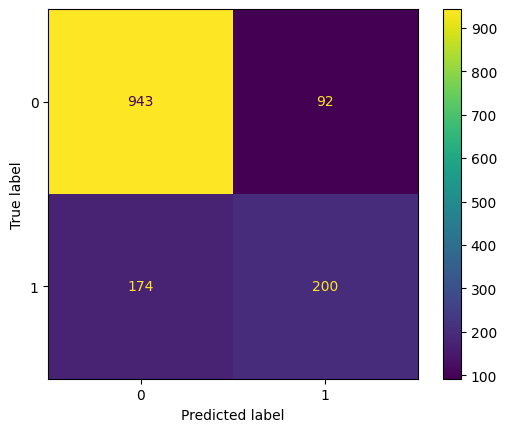

In [128]:
# predecir probabilidades
proba_modelo_forest  = modelo_forest.predict_proba(X_test)

# aplicar umbral 0.3
y_pred_umbral = (proba_modelo_forest >= 0.3).astype(int)

# Predicción sobre el set de prueba original (sin aplicar ningún re-muestreo)
y_previsto_forest = modelo_forest.predict(X_test)


# Métricas por clase (precisión, recall, F1) y promedios
print(classification_report(y_test, y_previsto_forest))


# Matriz de confusión (TN, FP, FN, TP) para diagnóstico rápido de errores
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto_forest);








              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1035
           1       0.56      0.76      0.65       374

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409



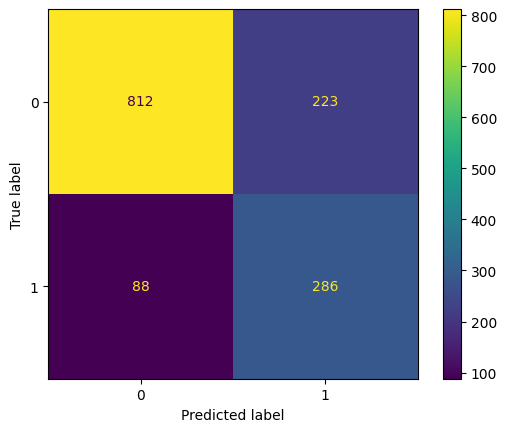

In [130]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# predecir probabilidades de la clase positiva (columna 1)
probas = modelo_forest.predict_proba(X_test)[:, 1]

# aplicar umbral 0.3
y_pred_umbral = (probas >= 0.3).astype(int)

# métricas
print(classification_report(y_test, y_pred_umbral))

# matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_umbral)

In [131]:
lista = [('de árbol', modelo_arbol, X_test),
         ('random forest', modelo_forest, X_test),
         ('regresión logisitca', modelo_logistica, X_test)]

# Iteramos sobre la lista e imprimimos el score (exactitud) de cada modelo
for i in lista:
  print(f'La exactitud del modelo {i[0]}: {i[1].score(i[2],y_test)}')

La exactitud del modelo de árbol: 0.7601135557132718
La exactitud del modelo random forest: 0.8112136266855926
La exactitud del modelo regresión logisitca: 0.8105039034776437


In [132]:
from sklearn.exceptions import NotFittedError

def check_entrenado(modelo, nombre):
    try:
        modelo.predict(X_test[:5])
        print(f"{nombre} ya está entrenado")
    except NotFittedError:
        print(f"{nombre} NO está entrenado, necesitas hacer .fit() antes")

check_entrenado(modelo_arbol, "Árbol de Decisión")
check_entrenado(modelo_forest, "Random Forest")
check_entrenado(modelo_logistica, "Regresión Logística")

✅ Árbol de Decisión ya está entrenado
✅ Random Forest ya está entrenado
✅ Regresión Logística ya está entrenado


## **Multicolinealidad**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Función para calcular la tabla de VIF de un subconjunto de columnas
def tabla_vif(Xsub):
    X_ = Xsub.astype(float).copy()
    cols = X_.columns.tolist()
    out = pd.DataFrame({
        'variables': cols,
        'vif': [vif(X_.values, i) for i in range(len(cols))]
    }).sort_values('vif', ascending=False).reset_index(drop=True)
    return out

In [ ]:
# --- Modelo 1: TODAS las explicativas tal como están en X_train
explicativas_1 = X_train.columns.tolist()

# --- Modelo 2: quitamos redundancias fuertes + resolvemos par teléfono/múltiples líneas
#     * CargoTotal es función de CargoMensual y MesesAntiguedad
#     * CuentasDiarias duplica a CargoMensual
#     * Si existen ambas: nos quedamos con LineasMultiples y quitamos ServicioTelefonico
redundantes = ['CargoTotal', 'CuentasDiarias']

# Si están ambas columnas, preferimos 'LineasMultiples' y removemos 'ServicioTelefonico'
if ('LineasMultiples' in X_train.columns) and ('ServicioTelefonico' in X_train.columns):
    redundantes.append('ServicioTelefonico')

# Variables explicativas sin redundancias
explicativas_2 = [c for c in X_train.columns if c not in redundantes]


# --- Modelo 3: relevantes por correlación con la respuesta (>= 0.10 en train)
tmp_corr = X_train.copy()
tmp_corr['Evasion'] = y_train  # añadimos y para medir la correlación con la respuesta

relevantes = (
    tmp_corr.corr(numeric_only=True)['Evasion']
           .abs()
           .sort_values(ascending=False)
)
umbral = 0.10
cols_corr = relevantes[relevantes >= umbral].index.tolist()

# removemos la propia 'Evasion'
cols_corr = [c for c in cols_corr if c != 'Evasion']

# quitamos las redundancias fuertes definidas en el bloque 2
cols_corr = [c for c in cols_corr if c not in ['CargoTotal', 'CuentasDiarias']]

# si aparecen ambas, nos quedamos con 'LineasMultiples' y quitamos 'ServicioTelefonico'
if ('ServicioTelefonico' in cols_corr) and ('LineasMultiples' in cols_corr):
    cols_corr.remove('ServicioTelefonico')

# para bajar VIF en modelos lineales:
# si está 'CargoMensual', quitamos 'MesesAntiguedad' (suele ser la fuente del VIF alto)
if ('CargoMensual' in cols_corr) and ('MesesAntiguedad' in cols_corr):
    cols_corr.remove('MesesAntiguedad')

explicativas_3 = cols_corr

In [ ]:
# VIF Modelo 1 (todas)
vif_1 = tabla_vif(X_train[explicativas_1])
print("VIF - Modelo 1 (todas las variables):")
display(vif_1)

# VIF Modelo 2 (sin redundancias)
vif_2 = tabla_vif(X_train[explicativas_2])
print("VIF - Modelo 2 (sin CargoTotal ni CuentasDiarias):")
display(vif_2)

# VIF Modelo 3 (solo relevantes por correlación + sin redundancias)
vif_3 = tabla_vif(X_train[explicativas_3])
print(f"VIF - Modelo 3 (|corr| >= {umbral} + limpieza de redundancias):")
display(vif_3)

print(f"#vars modelo1: {len(explicativas_1)} | modelo2: {len(explicativas_2)} | modelo3: {len(explicativas_3)}")

VIF - Modelo 1 (todas las variables):


,variables,vif
0,CuentasDiarias,642829.277638
1,CargoMensual,642623.144608
2,ServicioTelefonico,56.979888
3,ServicioInternet_Fibra óptica,24.436820
4,CargoTotal,21.208485
5,MesesAntiguedad,20.055225
6,ServicioInternet_No,10.252487
7,TipoContrato_Mensual,7.843340
8,StreamingPeliculas,6.241629
9,StreamingTV,6.163865


VIF - Modelo 2 (sin CargoTotal ni CuentasDiarias):


,variables,vif
0,CargoMensual,64.819150
1,ServicioInternet_Fibra óptica,9.234981
2,MesesAntiguedad,6.878952
3,TipoContrato_Mensual,6.305889
4,StreamingPeliculas,3.238664
5,StreamingTV,3.174834
6,FacturaElectronica,2.911070
7,TienePareja,2.805526
8,LineasMultiples,2.645836
9,ServicioInternet_No,2.527905


VIF - Modelo 3 (|corr| >= 0.1 + limpieza de redundancias):


,variables,vif
0,CargoMensual,20.146194
1,ServicioInternet_Fibra óptica,6.244382
2,TipoContrato_Mensual,3.433678
3,FacturaElectronica,2.877179
4,TienePareja,2.645582
5,SoporteTecnico,2.246461
6,SeguridadEnLinea,2.077398
7,MetodoPago_Cheque por correo,1.992283
8,ServicioInternet_No,1.987135
9,Dependientes,1.947694


#vars modelo1: 24 | modelo2: 21 | modelo3: 14


In [ ]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X_const = add_constant(X)

In [ ]:
X_const = X_const.astype(float)

# Drop columns with NaN values
X_const = X_const.dropna(axis=1)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [vif(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

,feature,VIF
23,CargoMensual,115446.765690
22,CuentasDiarias,114903.028961
0,const,639.624763
8,ServicioInternet_Fibra óptica,147.558598
9,ServicioInternet_No,103.184844
6,ServicioTelefonico,34.223956
15,StreamingPeliculas,23.945807
14,StreamingTV,23.816273
24,CargoTotal,10.786169
5,MesesAntiguedad,7.503669


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import RobustScaler
import pandas as pd

# -------------- Copia de trabajo
df_vif = datos_codificados.copy()

# -------------- Escalado robusto de las variables numéricas clave
num_cols = ['MesesAntiguedad', 'CargoMensual', 'CargoTotal']
scaler = RobustScaler()
df_vif[['MesesAntiguedad_scaled', 'CargoMensual_scaled', 'CargoTotal_scaled']] = scaler.fit_transform(df_vif[num_cols])

# Quitamos las originales para usar las escaladas (no cambia el VIF, pero iguala el enfoque de tu compañero)
df_vif = df_vif.drop(columns=num_cols)

# -------------- Matriz X para VIF: todas las explicativas (sin la respuesta)
X_vif = df_vif.drop(columns='Evasion', errors='ignore')

# Drop columns with NaN values from X_vif
X_vif = X_vif.dropna(axis=1)

# -------------- Cálculo de VIF
features = X_vif.columns.tolist()
df_vif_1 = pd.DataFrame({
    'Feature': features,
    'VIF': [vif(X_vif[features].values, i) for i in range(len(features))]
}).sort_values('VIF', ascending=False)

df_vif_1

,Feature,VIF
20,CuentasDiarias,2053.809194
4,ServicioTelefonico,359.216479
6,ServicioInternet_Fibra óptica,264.125519
7,ServicioInternet_No,132.804097
22,CargoMensual_scaled,119.756079
13,StreamingPeliculas,39.309411
12,StreamingTV,39.014295
5,LineasMultiples,12.567179
23,CargoTotal_scaled,12.440043
10,ProteccionDispositivo,10.527200


In [ ]:
# Eliminamos CargoTotal_scaled (total ~ mensual * meses)
X_vif2 = df_vif.drop(columns=['Evasion', 'CargoTotal_scaled','CuentasDiarias'])

# Drop columns with NaN values from X_vif2
X_vif2 = X_vif2.dropna(axis=1)

features2 = X_vif2.columns.tolist()
df_vif_2 = pd.DataFrame({
    'Feature': features2,
    'VIF': [vif(X_vif2[features2].values, i) for i in range(len(features2))]
}).sort_values('VIF', ascending=False)

df_vif_2

,Feature,VIF
21,CargoMensual_scaled,13.777358
4,ServicioTelefonico,11.281569
14,TipoContrato_Mensual,7.823396
6,ServicioInternet_Fibra óptica,7.791349
7,ServicioInternet_No,7.223163
16,FacturaElectronica,2.964058
12,StreamingTV,2.938904
13,StreamingPeliculas,2.929722
20,MesesAntiguedad_scaled,2.837226
2,TienePareja,2.828980


In [ ]:
X_vif3 = df_vif.drop(columns=['Evasion', 'CargoTotal_scaled', 'CargoMensual_scaled'])

# Drop columns with NaN values from X_vif3
X_vif3 = X_vif3.dropna(axis=1)

features3 = X_vif3.columns.tolist()
df_vif_3 = pd.DataFrame({
    'Feature': features3,
    'VIF': [vif(X_vif3[features3].values, i) for i in range(len(features3))]
}).sort_values('VIF', ascending=False)

df_vif_3

,Feature,VIF
20,CuentasDiarias,240.480692
4,ServicioTelefonico,45.024701
6,ServicioInternet_Fibra óptica,16.179674
14,TipoContrato_Mensual,7.760051
7,ServicioInternet_No,6.693586
13,StreamingPeliculas,5.021168
12,StreamingTV,4.908165
16,FacturaElectronica,2.955763
10,ProteccionDispositivo,2.941733
5,LineasMultiples,2.893420


ver: https://github.com/DanielRaiicHu/clasificacion_validacion_y_metricas/blob/main/Clasificacion_validacion_y_metricas.ipynb

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar el modelo
# Con delimitación en el Árbol de Decisión
modelo = DecisionTreeClassifier(max_depth=10) # Límite de profundidad
modelo.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.890414201183432
La exactitud del modelo con el conjunto de validación es de: 0.7622427253371186


In [ ]:
from sklearn.metrics import confusion_matrix

y_previsto = modelo.predict(X_val)

# Creamos la matriz de confusión, que muestra cómo se desempeñó el modelo al clasificar:
# - Verdaderos negativos (TN): clientes que permanecen bien clasificados como que permanecen (0)
# - Falsos positivos (FP): clientes que permanecen mal clasificados como que evaden (1)
# - Falsos negativos (FN): evasores mal clasificados como que permanecen (0)
# - Verdaderos positivos (TP): evasores bien clasificados como que evaden (1)

matriz_confusion = confusion_matrix(y_val,y_previsto)

# Imprimimos la matriz de confusión en forma de array 2x2
print(matriz_confusion)
print('\n')
print(f'Verdaderos Negativos: [{(matriz_confusion)[0,0]}]\nFalsos Positivos    : [{(matriz_confusion)[0,1]}]')
print(f'Falsos Negativos    : [{(matriz_confusion)[1,0]}]\nVerdaderos Positivos: [{(matriz_confusion)[1,1]}]')


[[887 148]
 [187 187]]


Verdaderos Negativos: [887]
Falsos Positivos    : [148]
Falsos Negativos    : [187]
Verdaderos Positivos: [187]


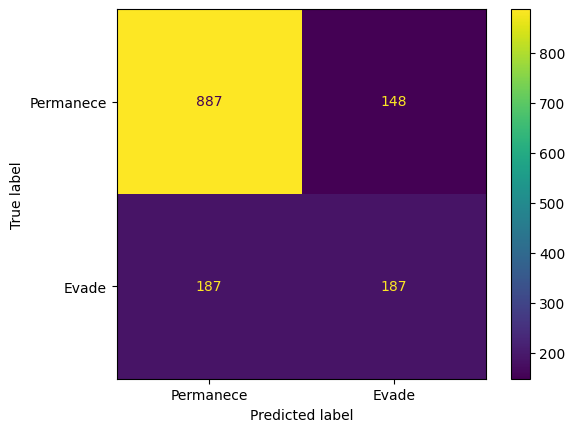

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

visualizacion = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion,
    display_labels=['Permanece', 'Evade']  # Etiquetas para las clases 0 y 1
)

visualizacion.plot();

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Calculos iniciales

# Calcula la PRECISIÓN (precision)
# Fórmula: TP / (TP + FP)
# ¿De todos los casos que predije como morosos, cuántos realmente lo eran?
print(f'La precisión del modelo de árbol es: {precision_score(y_val, y_previsto)}')

# Calcula la SENSIBILIDAD o RECALL
# Fórmula: TP / (TP + FN)
# ¿De todos los verdaderos morosos, cuántos logré identificar correctamente?
print(f'La sensibilidad (recall) del modelo de árbol es: {recall_score(y_val, y_previsto)}')

# Calcula la EXACTITUD (accuracy)
# Fórmula: (TP + TN) / (TP + TN + FP + FN)
# ¿Qué proporción total de predicciones fueron correctas?
print(f'La exactitud (accuracy) del modelo de árbol es: {accuracy_score(y_val, y_previsto)}')

# Calcula el F1-SCORE
# Fórmula: 2 * (precision * recall) / (precision + recall)
# Es el promedio armónico entre precisión y recall. Penaliza fuertemente los valores bajos.
print(f'El F1-Score del modelo de árbol es: {f1_score(y_val, y_previsto)}')

La precisión del modelo de árbol es: 0.5582089552238806
La sensibilidad (recall) del modelo de árbol es: 0.5
La exactitud (accuracy) del modelo de árbol es: 0.7622427253371186
El F1-Score del modelo de árbol es: 0.5275035260930888
